<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex2_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
%matplotlib inline

In [5]:
# Load training data set
data = np.loadtxt(open("ex2data1.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)
print ("X shape: " + str(X.shape))
print ("y shape: " + str(y.shape))

X shape: (100, 2)
y shape: (100,)


In [6]:
# Reshape X and y
X = X.T
y = y.reshape(1, m)
print ("X shape: " + str(X.shape))
print ("y shape: " + str(y.shape))

X shape: (2, 100)
y shape: (1, 100)


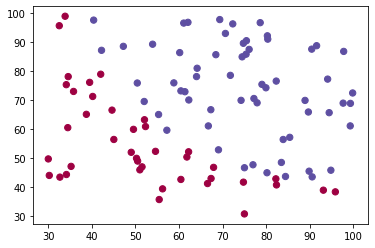

In [8]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [15]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 89 % (percentage of correctly labelled datapoints)


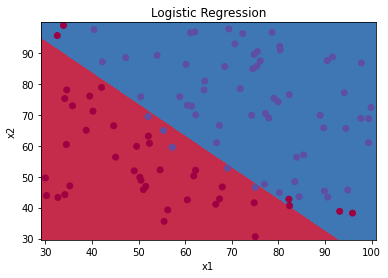

In [17]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")